<a href="https://colab.research.google.com/github/girta79/WoTech_Python_Individual_Work/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment Title: Introduction to Data Analysis with Python Pandas**

**Objective:** In this assignment, you will familiarize yourself with Python Pandas, a powerful library for data manipulation and analysis. You will use the Titanic dataset to perform exploratory data analysis (EDA) and create a visualization using Matplotlib pyplot.

**Instructions:**

1. **Dataset Acquisition:**

- Obtain the Titanic dataset. You can download it from reputable sources such as Kaggle (https://www.kaggle.com/c/titanic/data) or use datasets available directly through Python libraries.

2. **Exploratory Data Analysis (EDA):**

- Load the Titanic dataset into a Pandas DataFrame.
 Use Pandas methods to explore and understand the dataset:

   (1) Display the first few rows to get an overview of the data structure.

   (2) Check the dimensions of the dataset (number of rows and columns).

   (3) Identify missing values and decide on strategies for handling them.

   (4) Compute basic statistics (e.g., mean, median, min, max) for numerical columns.

   (5) Analyze categorical variables (e.g., value counts).

3. **Data Visualization:**

- Choose one column of the dataset that interests you
- Use Matplotlib pyplot to create a meaningful visualization:
   - Select an appropriate plot type (e.g., bar chart, histogram, pie chart).
   - Label axes, add a title.
   - Ensure the visualization is clear, informative, and visually appealing. smile

4. **Submission:**

- You can include code snippets, comments explaining your thought process
- Submit your completed assignment


**Resources:**

- Pandas Documentation: https://pandas.pydata.org/docs/
- Matplotlib Documentation: https://matplotlib.org/stable/contents.html


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# load the dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

In [27]:
# (1)
print("First rows of the dataset:")
df.head()

First rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
# (2)
print("\nDimensions of the dataset (rows, columns):")
df.shape


Dimensions of the dataset (rows, columns):


(891, 12)

In [29]:
# (3)
print("\nMissing values in the dataset are:")
df.isnull().sum()


Missing values in the dataset are:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**what stradegies to use to handle the missing values?**

In [ ]:
# (a) remove rows with missing values (did not use this option):

# df_dropped = df.dropna()
# print("\nDimensions after removing rows with missing values:")
# df_dropped.shape


In [30]:
# (b) fill missing values

# fill missing values in 'Age' with the mean (the missing values (NaN) are replaced with 30.4,
#  which is the average age of all the non-missing values in the 'Age' column) - since there were many values(177) missing
df['Age'].fillna(df['Age'].mean(), inplace=True)

# fill missing values in 'Cabin' with 'Unknown' - since there were too many values(687) missing
df['Cabin'].fillna('Unknown', inplace=True)

# fill missing values in 'Embarked' with the mode (the missing values (NaN) are replaced with 'S',
# which is the most frequent value in the 'Embarked' column) - since there were only 2 values missing
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

print("\nMissing values after filling:")
print(df.isnull().sum())


Missing values after filling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [31]:
# (4) basic statistics for numerical columns

print("\nBasic statistics for numerical columns:")
df.describe()


Basic statistics for numerical columns:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
# (5) categorical variables (value counts)

# PassengerId: unique identifier, each value should appear once
print("\nValue counts for 'PassengerId' column (showing first 10):")
print(df['PassengerId'].value_counts().head(10))

# Survived: whether a passenger survived (1) or not (0)
print("\nValue counts for 'Survived' column:")
print(df['Survived'].value_counts())

# Pclass: passenger class 1st, 2nd or 3rd
print("\nValue counts for 'Pclass' column:")
print(df['Pclass'].value_counts())

# Name: if passengers have unique names each value should appear once
print("\nValue counts for 'Name' column (showing first 10):")
print(df['Name'].value_counts().head(10))

# Sex: gender of the passengers: male or female
print("\nValue counts for 'Sex' column:")
print(df['Sex'].value_counts())

# Age: numerical values, how many passengers are the same age
print("\nValue counts for 'Age' column (showing first 10):")
print(df['Age'].value_counts().head(10))

# SibSp: the number of siblings or spouses on board
print("\nValue counts for 'SibSp' column:")
print(df['SibSp'].value_counts())

# Parch: the number of parents or children on board
print("\nValue counts for 'Parch' column:")
print(df['Parch'].value_counts())

# Ticket: ticket numbers, should be unique?
print("\nValue counts for 'Ticket' column (showing first 10):")
print(df['Ticket'].value_counts().head(10))

# Fare: the fare paid by each passenger
print("\nValue counts for 'Fare' column (showing first 10):")
print(df['Fare'].value_counts().head(10))

# Cabin: the cabin number, how many people in the cabin
print("\nValue counts for 'Cabin' column (showing first 10):")
print(df['Cabin'].value_counts().head(10))

# Embarked: the port of embarkation: C, Q or S (the count of passengers from each port)
print("\nValue counts for 'Embarked' column:")
print(df['Embarked'].value_counts())



Value counts for 'PassengerId' column (showing first 10):
PassengerId
1      1
599    1
588    1
589    1
590    1
591    1
592    1
593    1
594    1
595    1
Name: count, dtype: int64

Value counts for 'Survived' column:
Survived
0    549
1    342
Name: count, dtype: int64

Value counts for 'Pclass' column:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Value counts for 'Name' column (showing first 10):
Name
Braund, Mr. Owen Harris                            1
Boulos, Mr. Hanna                                  1
Frolicher-Stehli, Mr. Maxmillian                   1
Gilinski, Mr. Eliezer                              1
Murdlin, Mr. Joseph                                1
Rintamaki, Mr. Matti                               1
Stephenson, Mrs. Walter Bertram (Martha Eustis)    1
Elsbury, Mr. William James                         1
Bourke, Miss. Mary                                 1
Chapman, Mr. John Henry                            1
Name: count, dtype: int64

Value counts f

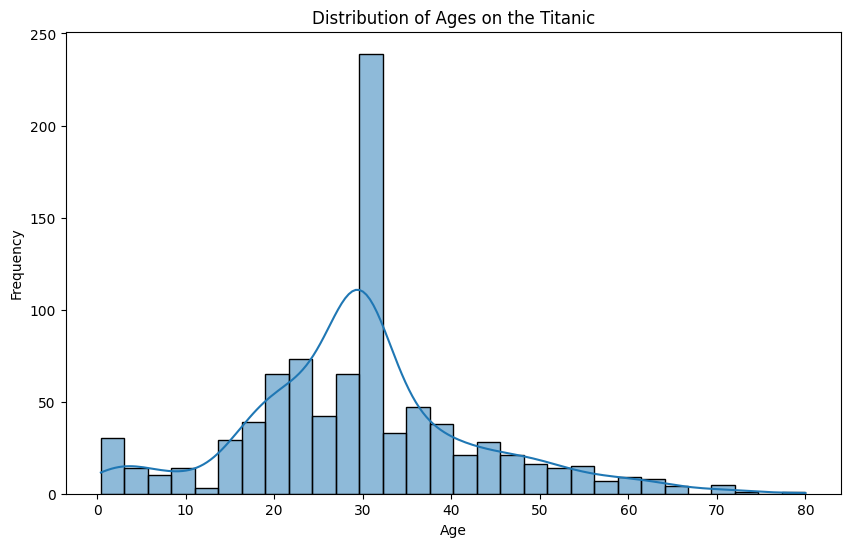

In [33]:
# histogram for the 'Age' column (missing values are replased with mean)

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Distribution of Ages on the Titanic')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [34]:
# with missing data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)


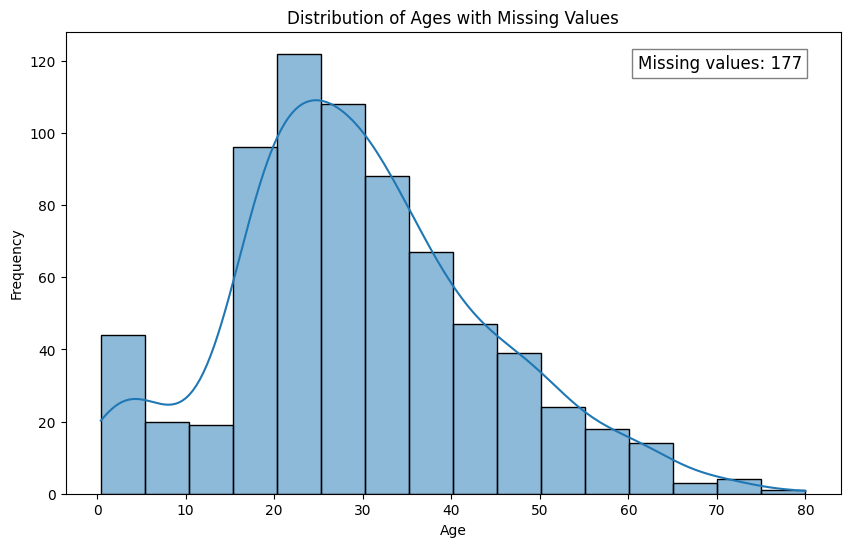

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, binwidth=5)
plt.title('Distribution of Ages with Missing Values')
plt.xlabel('Age')
plt.ylabel('Frequency')

# AI help:
missing_values_count = df['Age'].isnull().sum()
plt.text(0.95, 0.95, f'Missing values: {missing_values_count}',
         ha='right', va='top', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()
